In [1]:
import pandas as pd
import random
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
from datetime import date
from datetime import timedelta

In [26]:
def run_experiment():
    result = []
    control = items_number_target
    while control > 0:
        random_value = random.choice(input_sample)
        result.append(random_value)
        control = control - random_value
    return result

In [27]:
def monte_carlo():
    result = []
    for tries in range(tries_number):
        result.append(run_experiment())
    return result

In [28]:
def result_in_days():
    result = []
    for experiment in results:
        days_counter = len(experiment)
        finish_date = today + timedelta(days=int(days_counter))
        formated_finish_date = finish_date.strftime("%m/%d/%Y")
        result.append([today + timedelta(days=int(days_counter)), days_counter])
    return result

In [29]:
def result_in_days_simplified():
    result = []
    for experiment in results:
        days_counter = len(experiment)
        finish_date = today + timedelta(days=int(days_counter))
        formated_finish_date = finish_date.strftime("%Y-%m-%d")
        result.append(formated_finish_date)
    return result

In [30]:
# titanic = pd.read_csv("data/titanic.csv")

In [31]:
input_sample = [1,0,0,5,2,4,2,1,0,0,0,4,7]
tries_number = 10000
items_number_target = 100
today = date.today()

results = monte_carlo()

In [32]:
result_in_days()

[[datetime.date(2020, 8, 28), 49],
 [datetime.date(2020, 9, 2), 54],
 [datetime.date(2020, 9, 5), 57],
 [datetime.date(2020, 9, 2), 54],
 [datetime.date(2020, 9, 2), 54],
 [datetime.date(2020, 8, 23), 44],
 [datetime.date(2020, 9, 9), 61],
 [datetime.date(2020, 9, 5), 57],
 [datetime.date(2020, 9, 1), 53],
 [datetime.date(2020, 9, 5), 57],
 [datetime.date(2020, 8, 30), 51],
 [datetime.date(2020, 8, 30), 51],
 [datetime.date(2020, 8, 22), 43],
 [datetime.date(2020, 8, 18), 39],
 [datetime.date(2020, 8, 25), 46],
 [datetime.date(2020, 9, 2), 54],
 [datetime.date(2020, 8, 31), 52],
 [datetime.date(2020, 8, 31), 52],
 [datetime.date(2020, 9, 3), 55],
 [datetime.date(2020, 8, 28), 49],
 [datetime.date(2020, 9, 5), 57],
 [datetime.date(2020, 8, 30), 51],
 [datetime.date(2020, 8, 28), 49],
 [datetime.date(2020, 8, 31), 52],
 [datetime.date(2020, 9, 5), 57],
 [datetime.date(2020, 9, 5), 57],
 [datetime.date(2020, 9, 4), 56],
 [datetime.date(2020, 8, 17), 38],
 [datetime.date(2020, 9, 7), 59],


In [9]:
result_in_days_simplified()

['2020-08-23',
 '2020-08-30',
 '2020-08-26',
 '2020-09-07',
 '2020-08-21',
 '2020-08-29',
 '2020-09-09',
 '2020-08-28',
 '2020-08-26',
 '2020-08-30',
 '2020-09-15',
 '2020-08-30',
 '2020-09-05',
 '2020-08-21',
 '2020-08-24',
 '2020-09-08',
 '2020-09-04',
 '2020-08-20',
 '2020-09-07',
 '2020-08-30',
 '2020-08-19',
 '2020-08-28',
 '2020-08-17',
 '2020-09-15',
 '2020-08-22',
 '2020-08-25',
 '2020-08-29',
 '2020-08-31',
 '2020-08-29',
 '2020-09-04',
 '2020-09-11',
 '2020-09-05',
 '2020-09-01',
 '2020-09-07',
 '2020-08-28',
 '2020-08-19',
 '2020-09-03',
 '2020-08-29',
 '2020-09-02',
 '2020-08-27',
 '2020-08-24',
 '2020-09-12',
 '2020-09-07',
 '2020-09-10',
 '2020-09-05',
 '2020-08-31',
 '2020-08-23',
 '2020-08-27',
 '2020-08-29',
 '2020-08-22',
 '2020-09-04',
 '2020-09-02',
 '2020-09-09',
 '2020-08-27',
 '2020-08-26',
 '2020-08-29',
 '2020-09-09',
 '2020-09-08',
 '2020-08-27',
 '2020-09-04',
 '2020-08-25',
 '2020-09-04',
 '2020-09-02',
 '2020-08-20',
 '2020-08-24',
 '2020-08-31',
 '2020-08-

In [10]:
data_frame = pd.DataFrame(result_in_days_simplified(), columns = ['date'])
data_frame["date"] = data_frame["date"].astype("datetime64")
print(data_frame["date"].mean())

2020-08-29 17:36:23.039999744


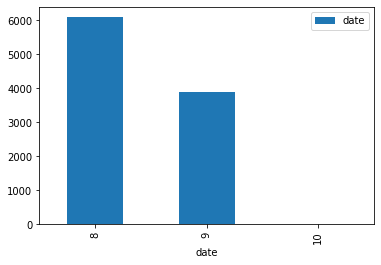

In [11]:
data_frame.groupby(data_frame["date"].dt.month).count().plot(kind="bar")

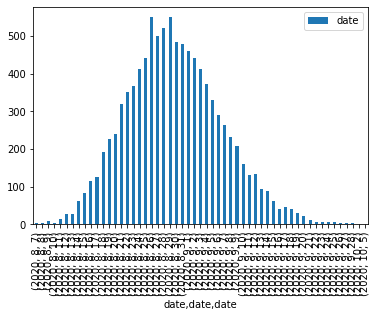

In [20]:
data_frame.groupby([data_frame["date"].dt.year, data_frame["date"].dt.month, data_frame["date"].dt.day]).count().plot(kind="bar")
plt.axvline(data_frame["date"].mean(), color='magenta', linestyle='--', linewidth=100)

In [13]:
np_result_in_days = np.array(result_in_days())

TypeError: unsupported operand type(s) for +: 'datetime.date' and 'datetime.date'

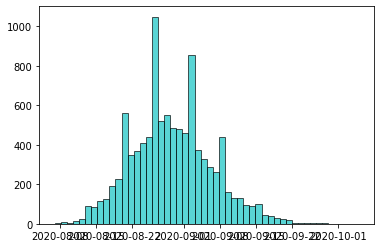

In [17]:
result = plt.hist(data_frame["date"], bins=50, color='c', edgecolor='k', alpha=0.65)
plt.axvline(np_result_in_days.mean(), color='k', linestyle='dashed', linewidth=1)
plt.axvline(np.percentile(np_result_in_days, 70), color='k', linestyle='dashed', linewidth=1)
plt.axvline(np.percentile(np_result_in_days, 85), color='k', linestyle='dashed', linewidth=1)

In [21]:

from datetime import timedelta
from collections import OrderedDict

def toDate():
    result = []
    sorted_result = np.sort(np_result_in_days)
    days = list(dict.fromkeys(sorted_result))
    today = date.today()
    print(days)
    for day in days:
        result.append(today + timedelta(days=int(day)))
        
    return result

In [22]:
toDate()

TypeError: '<' not supported between instances of 'int' and 'datetime.date'

In [ ]:
df = pd.DataFrame(result_in_days(), columns = ['date','accumulated']).drop(['accumulated'], axis=1)

In [ ]:
df.head()

In [ ]:
new_df = df.groupby(["date"]).size().reset_index(name='counts')

In [ ]:
new_df.head()

In [ ]:
df_bars = new_df.set_index(["date"])
df_bars.head()

In [ ]:
df_bars.plot(kind="bar", figsize=(15,5))
plt.show